In [1]:
# Required Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score

# Feature Engineering & Data Processing
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Tournament Simulation & Bracket Modeling
import itertools 
import networkx as nx 

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Path 
data_path = '/kaggle/input/march-machine-learning-mania-2025/'
# Game Results (Regular Season & Tournament)

df_regular_season_compact = pd.read_csv(data_path + "MRegularSeasonCompactResults.csv")
df_regular_season_detailed = pd.read_csv(data_path + "MRegularSeasonDetailedResults.csv")
df_tourney_compact = pd.read_csv(data_path + "MNCAATourneyCompactResults.csv")
df_tourney_detailed = pd.read_csv(data_path + "MNCAATourneyDetailedResults.csv")

# Tournament Seeding
df_seeds = pd.read_csv(data_path + "MNCAATourneySeeds.csv")

# Team Strength & Rankings
df_rankings = pd.read_csv(data_path + "MMasseyOrdinals.csv")

# Coaching Data
df_coaches = pd.read_csv(data_path + "MTeamCoaches.csv")

# Team Metadata
df_teams = pd.read_csv(data_path + "MTeams.csv")
df_team_spellings = pd.read_csv(data_path + "MTeamSpellings.csv", encoding="ISO-8859-1")

# Tournament Bracket Structure
df_tourney_slots = pd.read_csv(data_path + "MNCAATourneySlots.csv")
df_tourney_seed_round_slots = pd.read_csv(data_path + "MNCAATourneySeedRoundSlots.csv")

# Display basic info about datasets
print("Regular Season Compact Results:\n", df_regular_season_compact.head(), "\n")
print("NCAA Tournament Compact Results:\n", df_tourney_compact.head(), "\n")
print("Tournament Seeds:\n", df_seeds.head(), "\n")
print("Rankings:\n", df_rankings.head(), "\n")
print("Coaches:\n", df_coaches.head(), "\n")
print("Teams:\n", df_teams.head(), "\n")
print("Tournament Slots:\n", df_tourney_slots.head(), "\n")

Regular Season Compact Results:
    Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0 

NCAA Tournament Compact Results:
    Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0 

Tournament Seeds:
    Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374 

Ra

In [3]:
# Basic Info of all the dataset
print("Regular Season Compact Results:\n", df_regular_season_compact.isnull().sum(), "\n")
print("NCAA Tournament Compact Results:\n", df_tourney_compact.isnull().sum(), "\n")
print("Tournament Seeds:\n", df_seeds.isnull().sum(), "\n")
print("Rankings:\n", df_rankings.isnull().sum(), "\n")
print("Coaches:\n", df_coaches.isnull().sum(), "\n")
print("Teams:\n", df_teams.isnull().sum(), "\n")
print("Tournament Slots:\n", df_tourney_slots.isnull().sum(), "\n")

# There is no null values in these files

Regular Season Compact Results:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64 

NCAA Tournament Compact Results:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64 

Tournament Seeds:
 Season    0
Seed      0
TeamID    0
dtype: int64 

Rankings:
 Season           0
RankingDayNum    0
SystemName       0
TeamID           0
OrdinalRank      0
dtype: int64 

Coaches:
 Season         0
TeamID         0
FirstDayNum    0
LastDayNum     0
CoachName      0
dtype: int64 

Teams:
 TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64 

Tournament Slots:
 Season        0
Slot          0
StrongSeed    0
WeakSeed      0
dtype: int64 



In [4]:
# Data Cleaning Process

In [5]:
# Check missing values in all datasets
datasets = {
    "Regular Season Compact": df_regular_season_compact,
    "Regular Season Detailed": df_regular_season_detailed,
    "Tournament Compact": df_tourney_compact,
    "Tournament Detailed": df_tourney_detailed,
    "Tournament Seeds": df_seeds,
    "Rankings": df_rankings,
    "Coaches": df_coaches,
    "Teams": df_teams,
    "Team Spellings": df_team_spellings,
    "Tournament Slots": df_tourney_slots,
    "Seed Round Slots": df_tourney_seed_round_slots
}

# Display missing Values in each dataset
for name, df in datasets.items():
    print(f"Missing Values in {name}:\n", df.isnull().sum(), "\n")

Missing Values in Regular Season Compact:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64 

Missing Values in Regular Season Detailed:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64 

Missing Values in Tournament Compact:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64 

Missing Values in Tournament Detailed:
 Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3    

In [6]:
# Feature Engineering for NCAA Tournament Prediction

In [7]:


# Load the dataset
regular_season_detailed = df_regular_season_detailed

# Compute team-level statistics
winning_stats = regular_season_detailed.groupby("WTeamID").agg({
    "WScore": ["mean", "sum"],
    "WFGM": "mean", "WFGA": "mean", "WFGM3": "mean", "WFGA3": "mean",
    "WFTM": "mean", "WFTA": "mean", "WOR": "mean", "WDR": "mean",
    "WAst": "mean", "WTO": "mean", "WStl": "mean", "WBlk": "mean", "WPF": "mean"
}).reset_index()

# Rename columns for clarity
winning_stats.columns = ["TeamID", "AvgPointsScored", "TotalPointsScored",
                         "AvgFGM", "AvgFGA", "AvgFGM3", "AvgFGA3", 
                         "AvgFTM", "AvgFTA", "AvgOReb", "AvgDReb", 
                         "AvgAssists", "AvgTurnovers", "AvgSteals", 
                         "AvgBlocks", "AvgFouls"]

# Compute losing team stats similarly
losing_stats = regular_season_detailed.groupby("LTeamID").agg({
    "LScore": ["mean", "sum"],
    "LFGM": "mean", "LFGA": "mean", "LFGM3": "mean", "LFGA3": "mean",
    "LFTM": "mean", "LFTA": "mean", "LOR": "mean", "LDR": "mean",
    "LAst": "mean", "LTO": "mean", "LStl": "mean", "LBlk": "mean", "LPF": "mean"
}).reset_index()

# Rename columns for clarity
losing_stats.columns = ["TeamID", "AvgPointsAllowed", "TotalPointsAllowed",
                        "AvgFGM_Allowed", "AvgFGA_Allowed", "AvgFGM3_Allowed", "AvgFGA3_Allowed", 
                        "AvgFTM_Allowed", "AvgFTA_Allowed", "AvgOReb_Allowed", "AvgDReb_Allowed", 
                        "AvgAssists_Allowed", "AvgTurnovers_Allowed", "AvgSteals_Allowed", 
                        "AvgBlocks_Allowed", "AvgFouls_Allowed"]

# Merge winning and losing stats to get full team stats
team_stats = pd.merge(winning_stats, losing_stats, on="TeamID", how="outer").fillna(0)

# Compute Win Percentage
team_stats["WinRate"] = team_stats["TotalPointsScored"] / (team_stats["TotalPointsScored"] + team_stats["TotalPointsAllowed"])

# Save the processed features
team_stats.to_csv("Team_Stats.csv", index=False)

print("✅ Team-level features created successfully!")


✅ Team-level features created successfully!


In [8]:
# Load tournament seed data
tourney_seeds = df_seeds

# Extract numerical seed
tourney_seeds["SeedValue"] = tourney_seeds["Seed"].apply(lambda x: int(x[1:3]))

# Save processed seeds
tourney_seeds.to_csv("Processed_Seeds.csv", index=False)

print("✅ Tournament seeds extracted!")

✅ Tournament seeds extracted!


In [9]:
# Load rankings dataset
rankings = df_rankings

# Compute average ranking for each team per season
avg_rankings = rankings.groupby(["Season", "TeamID"]).agg({"OrdinalRank": "mean"}).reset_index()
avg_rankings.rename(columns={"OrdinalRank": "AvgRank"}, inplace=True)

# Save processed rankings
avg_rankings.to_csv("Processed_Rankings.csv", index=False)

print("✅ Team rankings processed!")

✅ Team rankings processed!


In [10]:
# Merge All Features

In [11]:
# Merge team stats with seeds
final_data = pd.merge(team_stats, tourney_seeds, on="TeamID", how="left")

# Merge with rankings
final_data = pd.merge(final_data, avg_rankings, on=["Season", "TeamID"], how="left")

# Fill missing values
final_data.fillna(0, inplace=True)

# Save the final feature dataset
final_data.to_csv("Final_Feature_Dataset.csv", index=False)

print("✅ Feature Engineering Completed!")


✅ Feature Engineering Completed!


In [12]:
#EDA

In [13]:
#Basic Statistics and Overview

# Load Dataset
regular_season = df_regular_season_detailed
tournament_results = df_tourney_detailed
team_info = df_teams

# Overview of Dataset
print(regular_season.info())
print(regular_season.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117748 entries, 0 to 117747
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   117748 non-null  int64 
 1   DayNum   117748 non-null  int64 
 2   WTeamID  117748 non-null  int64 
 3   WScore   117748 non-null  int64 
 4   LTeamID  117748 non-null  int64 
 5   LScore   117748 non-null  int64 
 6   WLoc     117748 non-null  object
 7   NumOT    117748 non-null  int64 
 8   WFGM     117748 non-null  int64 
 9   WFGA     117748 non-null  int64 
 10  WFGM3    117748 non-null  int64 
 11  WFGA3    117748 non-null  int64 
 12  WFTM     117748 non-null  int64 
 13  WFTA     117748 non-null  int64 
 14  WOR      117748 non-null  int64 
 15  WDR      117748 non-null  int64 
 16  WAst     117748 non-null  int64 
 17  WTO      117748 non-null  int64 
 18  WStl     117748 non-null  int64 
 19  WBlk     117748 non-null  int64 
 20  WPF      117748 non-null  int64 
 21  LFGM     1

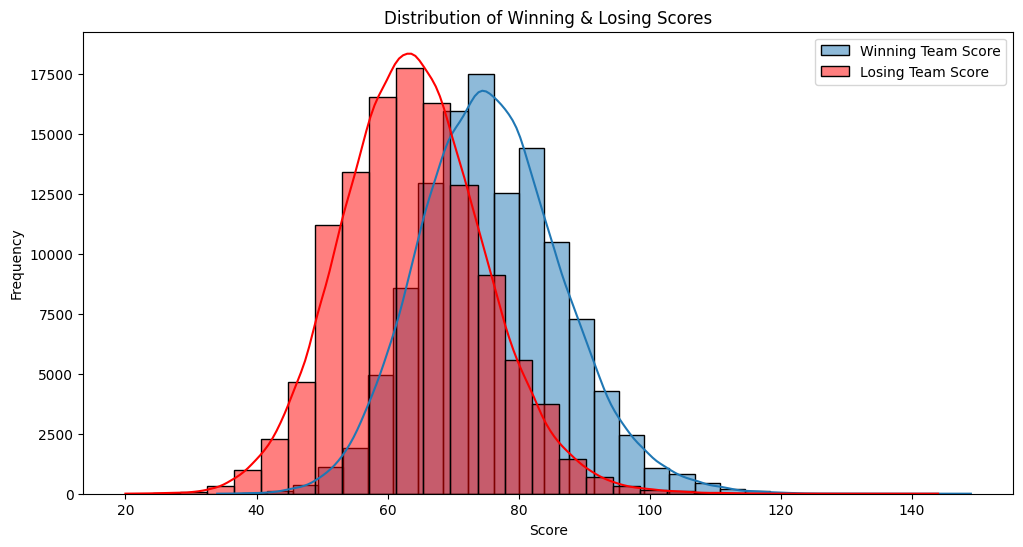

In [14]:
# Distribution of Team Scores
plt.figure(figsize=(12, 6))
sns.histplot(regular_season['WScore'], bins=30, kde=True, label='Winning Team Score')
sns.histplot(regular_season['LScore'], bins=30, kde=True, color='red', label='Losing Team Score')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Winning & Losing Scores")
plt.legend()
plt.show()

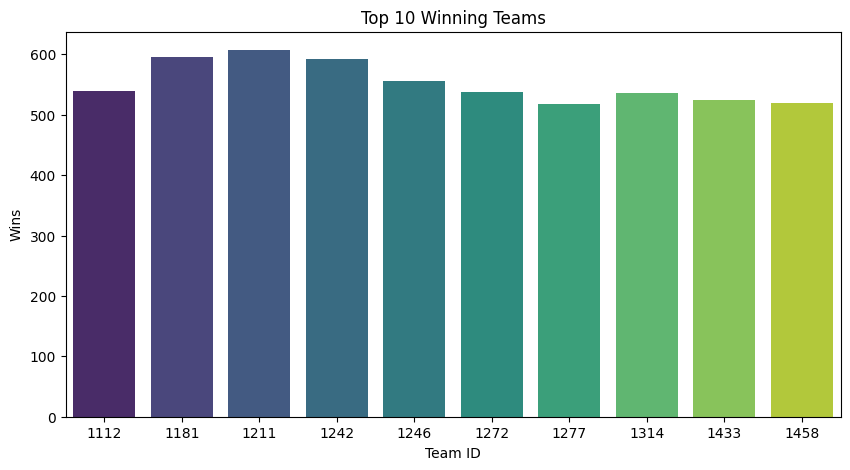

In [15]:
# Win/Loss Trends (Checking which teams win more often)

# Count wins per team
winning_teams = regular_season['WTeamID'].value_counts()
losing_teams = regular_season['LTeamID'].value_counts()

# Plot top 10 winning teams
plt.figure(figsize=(10, 5))
sns.barplot(x=winning_teams[:10].index, y=winning_teams[:10].values, palette='viridis')
plt.xlabel("Team ID")
plt.ylabel("Wins")
plt.title("Top 10 Winning Teams")
plt.show()
